In [268]:
!pip install spacy

In [269]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [270]:
!python -m spacy download en_core_web_sm

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Administrateur\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\Administrateur\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\Administrateur\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Users\Administrateur\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\Administrateur\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\Administrateur\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\Administrateur\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Users\Administrateur\anaconda3\lib\s

In [271]:
nlp = spacy.load("en_core_web_sm")

In [272]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [274]:
dataset = pd.read_csv('train.csv')
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [275]:
dataset.shape

(7613, 5)

In [276]:
dataset.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [277]:
#check missing values
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Percentage of missing values: 


id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [278]:
# take the columns that interest us 
dataset = dataset[["text", "target"]]
dataset.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


0    57.03
1    42.97
Name: target, dtype: float64


<AxesSubplot:xlabel='target', ylabel='count'>

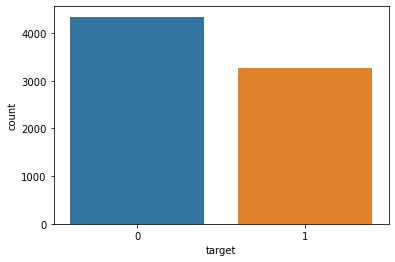

In [279]:
print((100*dataset.target.value_counts()/len(dataset)).round(2))
sns.countplot(x = dataset["target"])

In [280]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [281]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in dataset["text"]]
# Join corpus to make one full string
full_corpus = " ".join(stripped_corpus)

In [282]:
doc = nlp(full_corpus)

In [283]:
pip install wordcloud

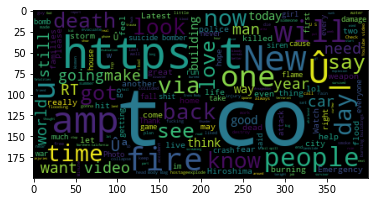

In [284]:
# Import matplotlib and wordcloud 
import matplotlib.pyplot as plt
import wordcloud


# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

### Preprocessing text

In [285]:
# Remove all punctuation
dataset['text_clean'] = dataset['text'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\]^`'{|}~]+", " ")
# Remove all non alphanumeric characters except whitespaces
dataset["text_clean"] = dataset["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_7792\130280518.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['text_clean'] = dataset['text'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\]^`'{|}~]+", " ")


In [286]:
dataset.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfires pou...


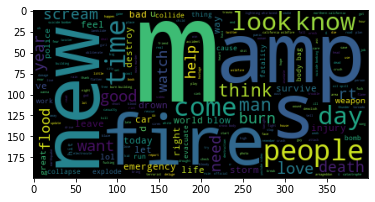

In [287]:
# Stripped corpus of text
stripped_corpus_clean = [text.strip() for text in dataset["text_clean"]]
# Join corpus to make one full string
full_corpus_clean = " ".join(stripped_corpus_clean)
# load your clean corpus in a doc object

# Generate wordcloud
cloud = wd.generate(full_corpus_clean)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

Tokenizing our tweets

In [288]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 1000, oov_token= "<OOV>") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.text_clean)
dataset["text_encoded"] = tokenizer.texts_to_sequences(dataset.text_clean)
dataset["len_tweet"] = dataset["text_encoded"].apply(lambda x: len(x))
dataset = dataset[dataset["len_tweet"]!=0] #some tweets might have been entirely erased, we remove those tweets

In [289]:
dataset.head()

,text,target,text_clean,text_encoded,len_tweet
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[1, 414, 171, 1, 1]",5
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[118, 4, 159, 511, 1, 1, 1]",7
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1, 442, 1, 325, 1, 293, 186, 1, 325, 342, 378]",11
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[1, 8, 1, 72, 186, 342, 37]",7
4,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfires pou...,"[260, 178, 122, 1, 1, 172, 1, 1, 111]",9


In [290]:
#padding the data
dataset_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.text_encoded, padding="post")
maxlen = dataset_pad.shape

In [319]:
maxlen[1]

25

Train Test Split

In [291]:
xtrain, xval, ytrain, yval = train_test_split(dataset_pad,dataset.target, test_size=0.2, stratify=dataset.target)

In [292]:
# create the tensor dataset for the training, and validation set.
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [293]:
# use .shuffle on the train set, and .batch on both sets to organise them by batches of 64 observations.
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [294]:
# let's take a look at one batch 
for tweet, target in train_batch.take(1):
  print(tweet, target)

tf.Tensor(
[[440 887  40 ...   0   0   0]
 [  1   1  68 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [  1 469 389 ...   0   0   0]
 [  1   1  28 ...   0   0   0]
 [  1   1   1 ...   0   0   0]], shape=(64, 25), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0], shape=(64,), dtype=int64)


### Modeling, an embedding

In [295]:
tweet.shape

TensorShape([64, 25])

In [296]:
vocab_size = len(tokenizer.word_index)
embedding_dim=16

model = tf.keras.Sequential([
                  # Input layer Word Embedding
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling, # this will pick the average for every word in the tweet
                  tf.keras.layers.GlobalAveragePooling1D(),
                  # Dense layers
                  tf.keras.layers.Dense(16, activation='relu'),
                  # The prediction layer
                  tf.keras.layers.Dense(1, activation="sigmoid")])

In [297]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            652800    
                                                                 
 global_average_pooling1d_5   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 653,345
Trainable params: 653,345
Non-trainable params: 0
_________________________________________________________________


In [298]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [299]:
#we'll then compile the model with 20 epochs
history = model.fit(
    train_batch,
    validation_data=val_batch,
    epochs=20)

Epoch 1/20
96/96 [==============================] - 8s 25ms/step - loss: 0.6751 - accuracy: 0.5703 - val_loss: 0.6637 - val_accuracy: 0.5706
Epoch 2/20
96/96 [==============================] - 2s 22ms/step - loss: 0.6421 - accuracy: 0.6057 - val_loss: 0.6161 - val_accuracy: 0.6579
Epoch 3/20
96/96 [==============================] - 2s 21ms/step - loss: 0.5749 - accuracy: 0.7315 - val_loss: 0.5478 - val_accuracy: 0.7420
Epoch 4/20
96/96 [==============================] - 2s 22ms/step - loss: 0.4970 - accuracy: 0.7970 - val_loss: 0.4879 - val_accuracy: 0.7827
Epoch 5/20
96/96 [==============================] - 2s 22ms/step - loss: 0.4418 - accuracy: 0.8207 - val_loss: 0.4625 - val_accuracy: 0.7899
Epoch 6/20
96/96 [==============================] - 2s 22ms/step - loss: 0.4121 - accuracy: 0.8281 - val_loss: 0.4575 - val_accuracy: 0.7886
Epoch 7/20
96/96 [==============================] - 2s 23ms/step - loss: 0.3962 - accuracy: 0.8289 - val_loss: 0.4561 - val_accuracy: 0.7932
Epoch 8/20
96

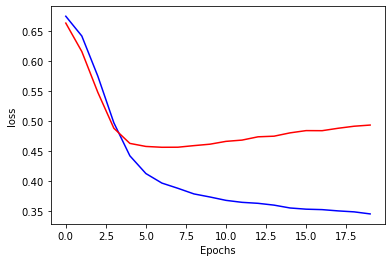

In [300]:
# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

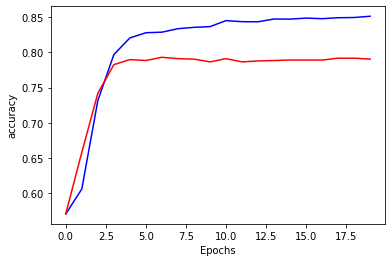

In [301]:
# Visualization of accuracy training 
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

### LSTM layers

In [302]:
from tensorflow.keras.layers import LSTM

model_lstm = tf.keras.Sequential([
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  tf.keras.layers.LSTM(units=32, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.LSTM(units=16, return_sequences=False), # returns the last output
                  # tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [303]:
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            652800    
                                                                 
 lstm_6 (LSTM)               (None, 25, 32)            8320      
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 664,401
Trainable params: 664,401
Non-trainable params: 0
_________________________________________________________________


In [304]:
optimizer= tf.keras.optimizers.Adam()

model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [305]:
history_lstm = model_lstm.fit(
    train_batch,
    validation_data=val_batch,
    epochs=20)

Epoch 1/20
96/96 [==============================] - 18s 71ms/step - loss: 0.6341 - accuracy: 0.6360 - val_loss: 0.4920 - val_accuracy: 0.7859
Epoch 2/20
96/96 [==============================] - 5s 50ms/step - loss: 0.4495 - accuracy: 0.8071 - val_loss: 0.4511 - val_accuracy: 0.7991
Epoch 3/20
96/96 [==============================] - 5s 54ms/step - loss: 0.4157 - accuracy: 0.8282 - val_loss: 0.4485 - val_accuracy: 0.7840
Epoch 4/20
96/96 [==============================] - 5s 56ms/step - loss: 0.3892 - accuracy: 0.8402 - val_loss: 0.4816 - val_accuracy: 0.7899
Epoch 5/20
96/96 [==============================] - 5s 52ms/step - loss: 0.3802 - accuracy: 0.8486 - val_loss: 0.4559 - val_accuracy: 0.7938
Epoch 6/20
96/96 [==============================] - 5s 53ms/step - loss: 0.3730 - accuracy: 0.8502 - val_loss: 0.4749 - val_accuracy: 0.7833
Epoch 7/20
96/96 [==============================] - 5s 55ms/step - loss: 0.3675 - accuracy: 0.8568 - val_loss: 0.4625 - val_accuracy: 0.7859
Epoch 8/20
9

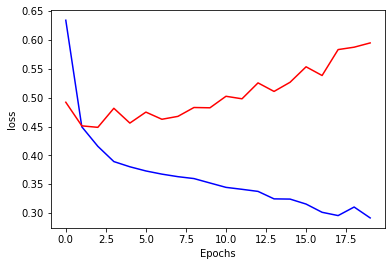

In [306]:
# Visualization of the training process on the loss function 
plt.plot(history_lstm.history["loss"], color="b")
plt.plot(history_lstm.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

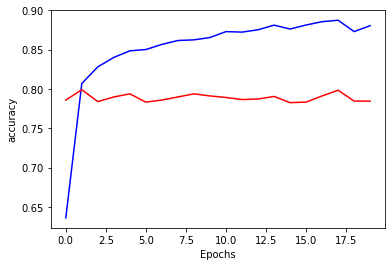

In [307]:
# Visualization of accuracy training 
plt.plot(history_lstm.history["accuracy"], color="b")
plt.plot(history_lstm.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

Make predictions on Test.csv

In [308]:
datatest = pd.read_csv("test.csv")
datatest.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [309]:
datatest.shape

(3263, 4)

### Preprocessing

In [310]:
# Remove all punctuation
datatest["text_clean"] = datatest['text'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\]^`'{|}~]+", " ")
# Remove all non alphanumeric characters except whitespaces
datatest["text_clean"] = datatest["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
datatest["text_clean"] = datatest["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
datatest["text_clean"] = datatest["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_7792\2679883908.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  datatest["text_clean"] = datatest['text'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\]^`'{|}~]+", " ")


In [311]:
datatest.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan


In [315]:
tokenizer.fit_on_texts(datatest.text_clean)
datatest["text_encoded"] = tokenizer.texts_to_sequences(datatest.text_clean)

In [317]:
datatest.head()

,id,keyword,location,text,text_clean,text_encoded
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash,"[123, 965, 50, 15]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe,"[85, 190, 1, 136, 425, 889]"
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street save,"[77, 3, 593, 1, 1, 1, 349, 103]"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire,"[249, 262, 1, 87]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan,"[378, 660, 12, 1, 594, 1]"


In [320]:
datatest_pad = tf.keras.preprocessing.sequence.pad_sequences(datatest.text_encoded, padding="post",maxlen=maxlen[1])

In [321]:
model_final = tf.keras.Sequential([
                  # Couche d'Input Word Embedding
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()

model_final.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model_final.fit(train_batch, 
                    epochs=4, 
                    validation_data=val_batch)

Epoch 1/4
96/96 [==============================] - 10s 42ms/step - loss: 0.6800 - accuracy: 0.5695 - val_loss: 0.6677 - val_accuracy: 0.5706
Epoch 2/4
96/96 [==============================] - 4s 41ms/step - loss: 0.6366 - accuracy: 0.6235 - val_loss: 0.5933 - val_accuracy: 0.6921
Epoch 3/4
96/96 [==============================] - 4s 43ms/step - loss: 0.5278 - accuracy: 0.7714 - val_loss: 0.4901 - val_accuracy: 0.7702
Epoch 4/4
96/96 [==============================] - 4s 43ms/step - loss: 0.4352 - accuracy: 0.8199 - val_loss: 0.4564 - val_accuracy: 0.7866


In [322]:
#Let's make predictions on the first batch of the test set
# test_input, test_target = next(iter(test_batch))
predictions = model_final.predict(datatest_pad)
predictions
# we get one porbability for each class

102/102 [==============================] - 1s 4ms/step


array([[0.4937977 ],
       [0.42699605],
       [0.17456038],
       ...,
       [0.6778648 ],
       [0.07839847],
       [0.38458183]], dtype=float32)

In [328]:
datatest_pred = pd.DataFrame(predictions, columns=['id'])

In [330]:
datatest_pred["target"] = datatest_pred["id"].apply(lambda x : 0 if x <0.5
                                    else 1)
datatest_pred

,id,target
0,0.493798,0
1,0.426996,0
2,0.174560,0
3,0.172211,0
4,0.612690,1
...,...,...
3258,0.905864,1
3259,0.731199,1
3260,0.677865,1
3261,0.078398,0


In [331]:
datatest_pred['target'].value_counts()

0    1893
1    1370
Name: target, dtype: int64

In [332]:
# Save the predictions into a csv file for submission as request
datatest_pred.to_csv('submission.csv', header = True, index = False)